# Week 1 Analysis Notebook

This notebook is for all the work that was done in the first week of the project. This mainly includes introductory work, getting familiar with CAESAR, FSPS, H5py and messing around with the data.

The main file being used is m25n256_151.hdf5 which is the caesar catalog from a 25 Mpc/h volume with 2x256^3 particles, at z=0

In [26]:
import fsps
import h5py
import synphot
import caesar 
import yt
import numpy as np
import matplotlib.pyplot as plt

In [52]:
infile = (r"/home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256_151.hdf5")
obj = caesar.load(infile)

yt : [INFO     ] 2026-01-17 13:07:24,253 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256_151.hdf5
yt : [INFO     ] 2026-01-17 13:07:24,268 Found 7567 halos
yt : [INFO     ] 2026-01-17 13:07:24,272 Found 926 galaxies


Text(0.5, 1.0, 'Galaxy Mass Distribution')

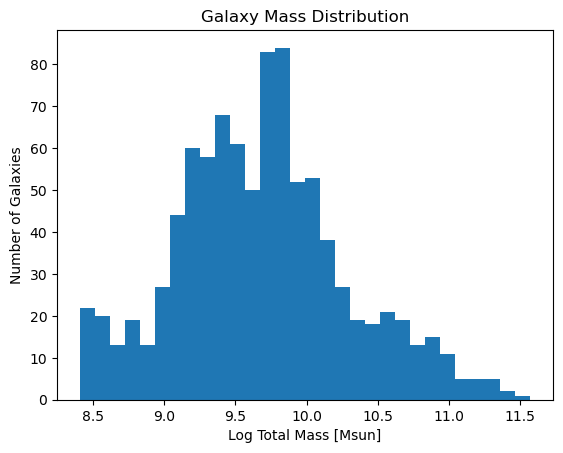

In [28]:
galaxy_masses = [i.masses['total'] for i in obj.galaxies]
plt.hist(np.log10(galaxy_masses), bins=30)
plt.xlabel('Log Total Mass [Msun]')
plt.ylabel('Number of Galaxies')
plt.title('Galaxy Mass Distribution')

In [6]:
fsps.list_filters()

['v',
 'u',
 'b',
 'buser_b',
 'cousins_r',
 'cousins_i',
 'cfht_b',
 'cfht_r',
 'cfht_i',
 '2mass_j',
 '2mass_h',
 '2mass_ks',
 'sdss_u',
 'sdss_g',
 'sdss_r',
 'sdss_i',
 'sdss_z',
 'wfpc2_f255w',
 'wfpc2_f300w',
 'wfpc2_f336w',
 'wfpc2_f439w',
 'wfpc2_f450w',
 'wfpc2_f555w',
 'wfpc2_f606w',
 'wfpc2_f814w',
 'wfpc2_f850lp',
 'wfc_acs_f435w',
 'wfc_acs_f475w',
 'wfc_acs_f555w',
 'wfc_acs_f606w',
 'wfc_acs_f625w',
 'wfc_acs_f775w',
 'wfc_acs_f814w',
 'wfc_acs_f850lp',
 'wfc3_uvis_f218w',
 'wfc3_uvis_f225w',
 'wfc3_uvis_f275w',
 'wfc3_uvis_f336w',
 'wfc3_uvis_f390w',
 'wfc3_uvis_f438w',
 'wfc3_uvis_f475w',
 'wfc3_uvis_f555w',
 'wfc3_uvis_f606w',
 'wfc3_uvis_f775w',
 'wfc3_uvis_f814w',
 'wfc3_uvis_f850lp',
 'wfc3_ir_f098m',
 'wfc3_ir_f105w',
 'wfc3_ir_f110w',
 'wfc3_ir_f125w',
 'wfc3_ir_f140w',
 'wfc3_ir_f160w',
 'irac_1',
 'irac_2',
 'irac_3',
 'irac_4',
 'isaac_ks',
 'fors_v',
 'fors_r',
 'nicmos_f110w',
 'nicmos_f160w',
 'galex_fuv',
 'galex_nuv',
 'des_g',
 'des_r',
 'des_i',
 'des_z

In [ ]:
#file structure
with h5py.File(infile, 'r') as f:
    def print_structure(name, obj):
        print(name)
    
    print("HDF5 File Structure:")
    f.visititems(print_structure)
    
    print("\nTop-level keys:", list(f.keys()))

Found appmag keys: ['appmag.2mass_h', 'appmag.2mass_j', 'appmag.2mass_ks', 'appmag.b', 'appmag.bessell_l', 'appmag.bessell_lp', 'appmag.bessell_m', 'appmag.buser_b', 'appmag.cfht_b', 'appmag.cfht_i', 'appmag.cfht_r', 'appmag.cousins_i', 'appmag.cousins_r', 'appmag.des_g', 'appmag.des_i', 'appmag.des_r', 'appmag.des_y', 'appmag.des_z', 'appmag.euclid_blue', 'appmag.euclid_h', 'appmag.euclid_j', 'appmag.euclid_red', 'appmag.euclid_y', 'appmag.fors_r', 'appmag.fors_v', 'appmag.galex_fuv', 'appmag.galex_nuv', 'appmag.i1500', 'appmag.i2300', 'appmag.i2800', 'appmag.irac_1', 'appmag.irac_2', 'appmag.isaac_ks', 'appmag.jwst_f070w', 'appmag.jwst_f090w', 'appmag.jwst_f115w', 'appmag.jwst_f150w', 'appmag.jwst_f200w', 'appmag.jwst_f277w', 'appmag.jwst_f356w', 'appmag.jwst_f444w', 'appmag.lsst_g', 'appmag.lsst_i', 'appmag.lsst_r', 'appmag.lsst_u', 'appmag.lsst_y', 'appmag.lsst_z', 'appmag.megacam_g', 'appmag.megacam_i', 'appmag.megacam_r', 'appmag.megacam_u', 'appmag.megacam_z', 'appmag.newfirm_h1

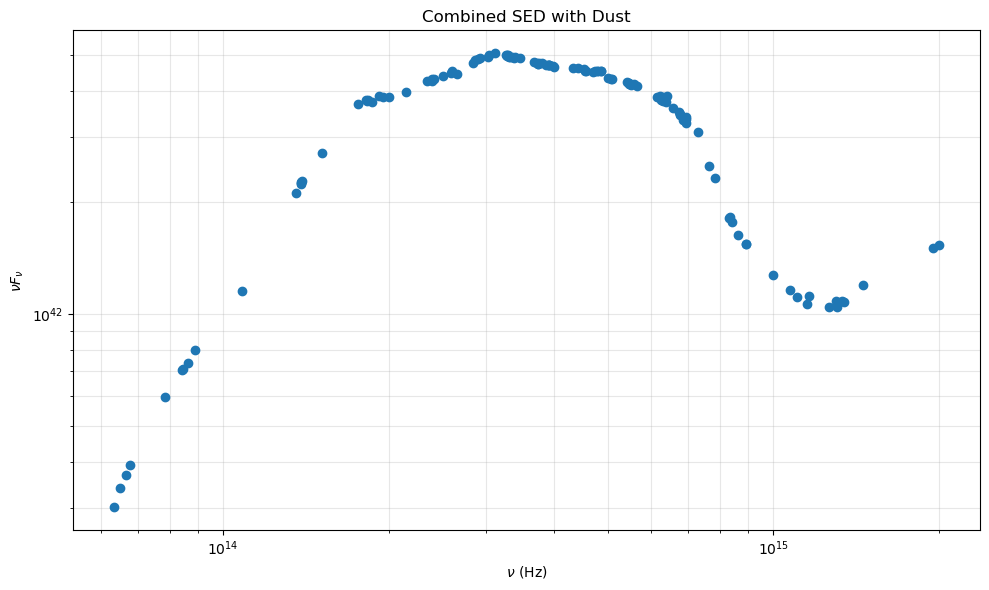

In [ ]:
import astropy.units as u
from astropy.constants import c

with h5py.File(infile, 'r') as f:
    appmag_keys = [k for k in f['galaxy_data/dicts'].keys() if k.startswith('appmag.')]
    print("Found appmag keys:", appmag_keys)

    freqs = []
    fluxes = []
    labels = []

    for k in appmag_keys:
        mags = f[f'galaxy_data/dicts/{k}'][:]           # per-galaxy apparent mags (with dust)
        flux = 3631*10**(-mags / 2.5)                        # mag -> flux assuming AB
        filt = k.split('appmag.')[-1]                   

        try:
            fsps_filt = fsps.get_filter(filt)           # FSPS filter name
            wave = fsps_filt.lambda_eff * u.AA          # Angstrom
            freq = (c / wave).to(u.Hz).value            # ν = c / λ

            freqs.append(freq)
            fluxes.append(np.sum(flux))
            labels.append(filt)
        except Exception as e:
            print(f"Skipping {filt}: {e}")

freqs = np.array(freqs)
fluxes = np.array(fluxes)
labels = np.array(labels)
order = np.argsort(freqs)
freqs = freqs[order]
fluxes = fluxes[order]
labels = labels[order]

nu_f_nu = freqs * fluxes

plt.figure(figsize=(10, 6))
plt.loglog(freqs, nu_f_nu, 'o', linewidth=2, markersize=6)
plt.xlabel(r'$\nu$ (Hz)')
plt.ylabel(r'$\nu F_\nu$')
plt.title('SED')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()